# Exercises for Video Lecture 2
Corresponds to Chapters 2 & 3 of the book.

In [64]:
import arviz as az
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import binom

from stats_helpers import binomial_posterior, binomial_ppd

# Set the style from the mplstyle file
STYLE = "../statistical-rethinking-2023.mplstyle"
style.use(STYLE)


## Chapter 2
### Exercise 2M1
Recall the globe tossing model from the chapter. Compute and plot the 
grid approximate posterior distribution for each of the following sets of observations.
In each case, assume a uniform prior for $p$.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [65]:
data_samples = [
    "WWW",
    "WWWL",
    "LWWLWWW"
]
# Convert the data samples to boolean arrays
data_arrays = [
    np.array([i == "W" for i in sample]) for sample in data_samples
]

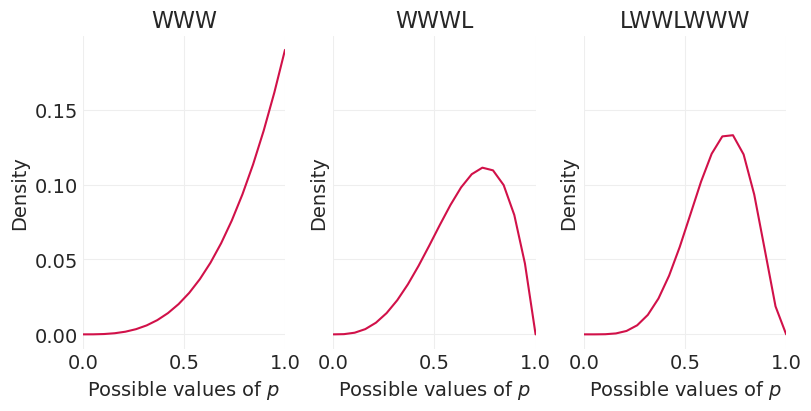

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

density_xlabel = "Possible values of $p$"
density_ylabel = "Density"

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Exercise 2M2
Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and
is a positive constant when $p ≥ 0.5$.

Again compute and plot the grid approximate posterior distribution
for each of the sets of observations in the problem just above.

In [67]:
# Prior is defined on the [0, 1] interval and is 0 before 0.5 and uniform
# after 0.5. The values > 0.5 are set to 2 to make th integral sum to 1.
modified_prior = np.zeros(20)
modified_prior[10:] = 2 


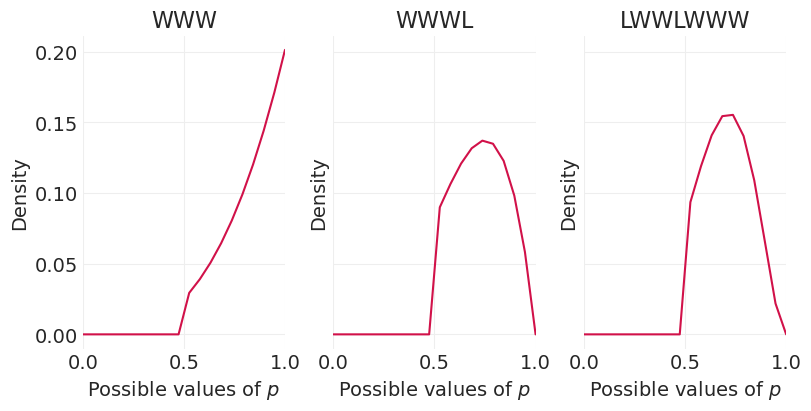

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20, prior=modified_prior)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Chapter 3
The following Easy problems use the samples from the posterior 
distribution for the globe tossing example.

This code will give you a specific set of samples,
so that you can check your answers exactly.

This is the R code:
```r
p_grid <-seq(from=0,to=1,length.out=1000)
prior <-rep(1,1000)
likelihood <-dbinom(6,size=9,prob=p_grid)
posterior <-likelihood*prior
posterior <-posterior/sum(posterior)
set.seed(100)
samples <-sample(p_grid,prob=posterior,size=1e4,replace=TRUE)
```

And below is the equivalent Python code:

In [69]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(6, 9, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)
samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)

### Exercises 3E1 - 3E7
- How much posterior probability lies below $p = 0.2$?
- How much posterior probability lies above $p = 0.8$?
- How much posterior probability lies between $p = 0.2$ and $p = 0.8$?

In [70]:
print((samples < 0.2).mean())
print((samples > 0.8).mean())
print(((samples > 0.2) & (samples < 0.8)).mean())

0.0013
0.1155
0.8832


- 20% of the posterior probability lies below which value of $p$?
- 20% of the posterior probability lies above which value of $p$?

In [71]:
lower, upper = np.percentile(samples, [20, 80])
print(f"{lower:.2f} - {upper:.2f}")

0.52 - 0.76


- Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?
- Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [72]:
print("HDPI 66%")
lower, upper = az.hdi(samples, hdi_prob=0.66)
print(f"{lower:.2f} - {upper:.2f}")

print("\nPI 66%")
lower, upper = np.percentile(samples, [34/2, 100 - 34/2])
print(f"{lower:.2f} - {upper:.2f}")

HDPI 66%
0.52 - 0.79

PI 66%
0.50 - 0.77


### Exercise 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses.

Construct the posterior distribution, using grid approximation.

Use the same flat prior as before.

In [73]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(8, 15, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)

Text(0, 0.5, 'Density')

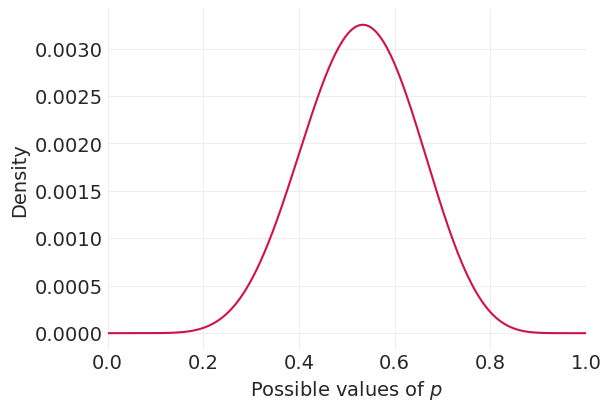

In [74]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_grid, posterior)
ax.set_xlim(0, 1)
ax.set_xlabel(density_xlabel)
ax.set_ylabel(density_ylabel)

### Exercise 3M2
Draw 10,000 samples from the grid approximation from above.

Then use the sample to calculate the 90% HPDI for p.

In [75]:
samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)

Text(0, 0.5, 'Density')

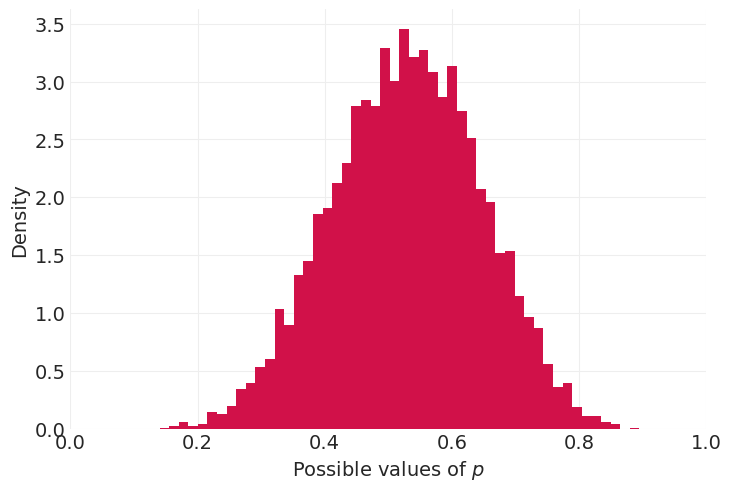

In [76]:
plt.hist(samples, bins=50, density=True)
plt.xlim(0, 1)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)

In [77]:
lower, upper = az.hdi(samples, hdi_prob=0.9)
print(f"{lower:.2f} - {upper:.2f}")

0.33 - 0.72


### Exercise 3M3
Construct a posterior predictive check for this model and data.

This means simulate the distribution of samples, averaging over the posterior uncertainty in p.

What is the probability of observing 8 water in 15 tosses?

In [79]:
# Compute the posterior predictive distribution by sampling from the posterior
# and then computing the binomial distribution for each sample.
ppd = binom.rvs(15, samples, size=10_000, random_state=rng)  # n ,p, size
print((ppd == 8).mean())

0.148


### Exercise 3M4
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [36]:
# Compute the probability of observing 6 water in 9 tosses given a posterior
# distribution of p.
ppd = binom.rvs(9, samples, size=10_000, random_state=rng)
print((ppd == 6).mean())

0.1847


### Exercise 3M5
Start over at 3M1, but now use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$.
This corresponds to prior information that a majority of the Earth's surface is water.
Repeat each problem above and compare the inferences (using both priors) to the true value $p = 0.7.$

In [80]:
p_grid = np.linspace(0, 1, 1000)
modified_prior = np.zeros(1000)
modified_prior[500:] = 2
modified_likelihood = binom.pmf(8, 15, p_grid)
modified_posterior = modified_prior * modified_likelihood
modified_posterior /= np.sum(modified_posterior)

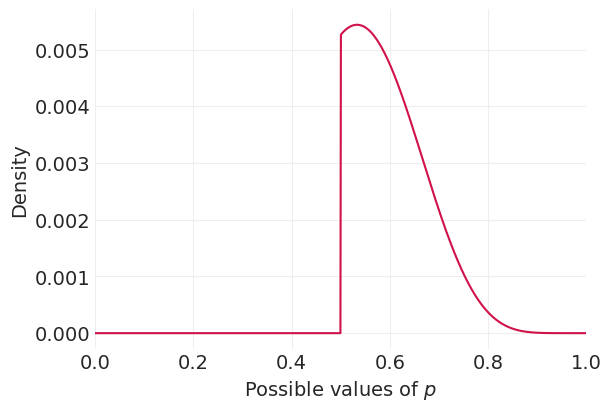

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_grid, modified_posterior)
ax.set_xlim(0, 1)
ax.set_xlabel(density_xlabel)
ax.set_ylabel(density_ylabel);

Text(0, 0.5, 'Density')

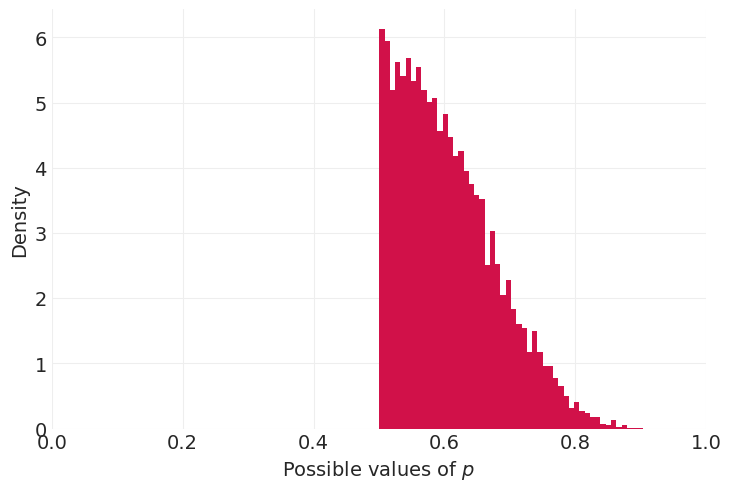

In [84]:
modified_samples = rng.choice(p_grid, size=10_000, replace=True, p=modified_posterior)
plt.hist(modified_samples, bins=50, density=True)
plt.xlim(0, 1)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)

In [86]:
lower, upper = az.hdi(modified_samples, hdi_prob=0.9)
print(f"{lower:.2f} - {upper:.2f}")

0.50 - 0.71


In [87]:
modified_ppd = binom.rvs(15, modified_samples, size=10_000, random_state=rng)  # n ,p, size
print((modified_ppd == 8).mean())

0.1588


In [88]:
modified_ppd = binom.rvs(9, modified_samples, size=10_000, random_state=rng)
print((ppd == 6).mean())

0.1101


### Exercise 3M6
Suppose you want to estimate the Earth's proportion of water very precisely.
Specifically, you want the 99% percentile interval of the posterior distribution of $p$ to be only 0.05 wide.
This means the distance between the upper and lower bound of the interval should be 0.05.
How many times will you have to toss the globe to do this?

In [150]:
def calculate_interval_width(n_trials):
    """Calculate the width of an interval that contains 99% of the posterior
    distribution of a binomial distribution with p = 0.7, after observing
    n_trials (tosses).
    """
    p_grid = np.linspace(0, 1, 1000) # Define the grid of possible values of p
    prior = np.ones(1000)   # uniform prior

    # simulate the experiment (1 series of n_trials tosses)
    # to get the observed number of water nW
    nW = binom.rvs(n_trials, 0.7, size=1)
    # compute the posterior using the observed nW
    likelihood = binom.pmf(nW, n_trials, p_grid)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    # sample from the posterior
    samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)
    # calculate the width of a 99% percentile interval
    tail_width = (1 - 0.99) / 2
    lower, upper = np.quantile(samples, [tail_width, 1 - tail_width])
    return upper - lower

In [152]:
# Define the values of n_trials for which we want to calculate the width
trials_grid = np.arange(0, 3001, 50)

widths_per_exp = []
min_trials_per_exp = []
# Do the experiment 20 times (different random seeds each time)
# and average the results
for _ in range(20):
    # Calculate the width of the interval for each number of trials
    widths = np.array(
        [calculate_interval_width(n_trials) for n_trials in trials_grid]
    )
    # Find the smallest number of trials that results in a width of 0.05
    min_n_trials = trials_grid[np.nonzero(widths <= 0.05)].min()
    widths_per_exp.append(widths)
    min_trials_per_exp.append(min_n_trials)

In [158]:
# Calculate the mean and std (across 20 experiments)
# of the number of trials to reach 0.05 width
print(f"{np.mean(min_trials_per_exp):.2f} +/- {np.std(min_trials_per_exp):.2f}")

2252.50 +/- 58.04


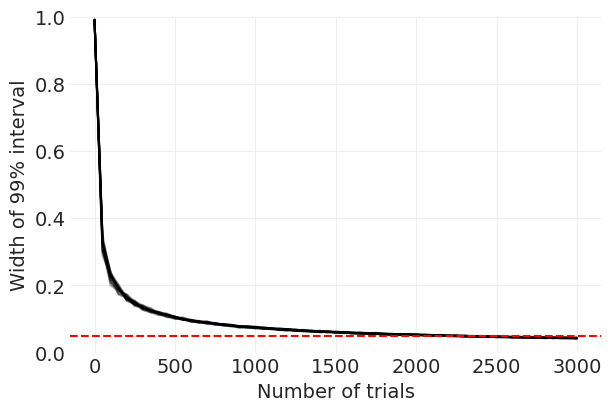

In [159]:
fig, ax = plt.subplots(figsize=(6, 4))
for widths in widths_per_exp:
    ax.plot(trials_grid, widths, color="black", alpha=0.3)

ax.axhline(0.05, color="red", linestyle="--")
ax.set_ylim(0, 1)
ax.set_xlabel("Number of trials")
ax.set_ylabel("Width of 99% interval");

2200
